# Liver Disease Classification Using Machine Learning
This project predicts liver disease using clinical patient data. Multiple machine learning models are trained and evaluated to determine the best performing model.


##  SDG Alignment

### SDG 3 – Good Health and Well Being
This project supports early detection of liver disease using predictive analytics.


## importing required libraries and loading dataset

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [199]:
df=pd.read_csv("Liver Patient Dataset.csv", encoding="latin1")
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


##  Initial Data Exploration
Checking dataset structure, missing values and data types.



In [200]:
df.isna().sum(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

(Age of the patient                        2
 Gender of the patient                   902
 Total Bilirubin                         648
 Direct Bilirubin                        561
  Alkphos Alkaline Phosphotase           796
  Sgpt Alamine Aminotransferase          538
 Sgot Aspartate Aminotransferase         462
 Total Protiens                          463
  ALB Albumin                            494
 A/G Ratio Albumin and Globulin Ratio    559
 Result                                    0
 dtype: int64,
 None)

##  Data Cleaning

- Removing extra spaces and formatting column names.

### Handling Missing Values
- Median used for numerical columns
- Mode used for categorical column (Gender)


In [201]:
df.columns=df.columns.str.strip().str.replace(' ', '_')
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df["Gender_of_the_patient"] = df["Gender_of_the_patient"].fillna(df["Gender_of_the_patient"].mode()[0])
df.isna().sum()

Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64

###  Removing Duplicate Records
Duplicate patient records are removed.


In [202]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

11608


##  Dataset Summary
Displaying dataset structure and statistical summary.


In [203]:
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(19083, 11)
   Age_of_the_patient Gender_of_the_patient  Total_Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct_Bilirubin  Alkphos_Alkaline_Phosphotase  \
0               0.1                         187.0   
1               5.5                         699.0   
2               4.1                         490.0   
3               0.4                         182.0   
4               2.0                         195.0   

   Sgpt_Alamine_Aminotransferase  Sgot_Aspartate_Aminotransferase  \
0                           16.0                             18.0   
1                           64.0                            100.0   
2                           60.0                             68.0   
3       

## Class Distribution Visualization
Visualizing distribution of liver disease classes.


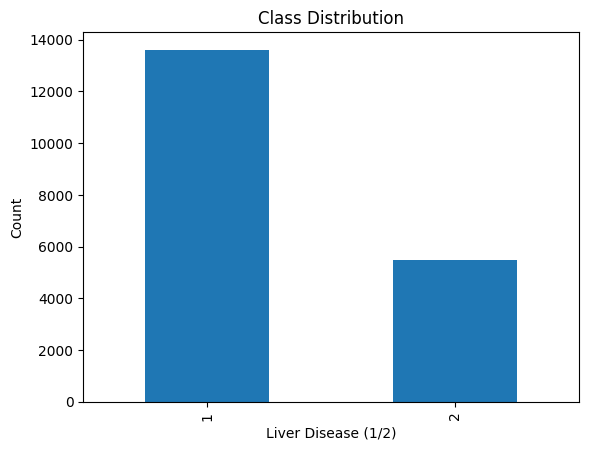

In [204]:
df['Result'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Liver Disease (1/2)")
plt.ylabel("Count")
plt.show()

##  Correlation Analysis
Identifying relationship between features and target variable.


In [205]:
correlation=df.corr(numeric_only=True)['Result']
print(correlation)

Age_of_the_patient                     -0.004612
Total_Bilirubin                        -0.224597
Direct_Bilirubin                       -0.246980
Alkphos_Alkaline_Phosphotase           -0.180222
Sgpt_Alamine_Aminotransferase          -0.161968
Sgot_Aspartate_Aminotransferase        -0.157675
Total_Protiens                          0.038447
ALB_Albumin                             0.165456
A/G_Ratio_Albumin_and_Globulin_Ratio    0.160145
Result                                  1.000000
Name: Result, dtype: float64


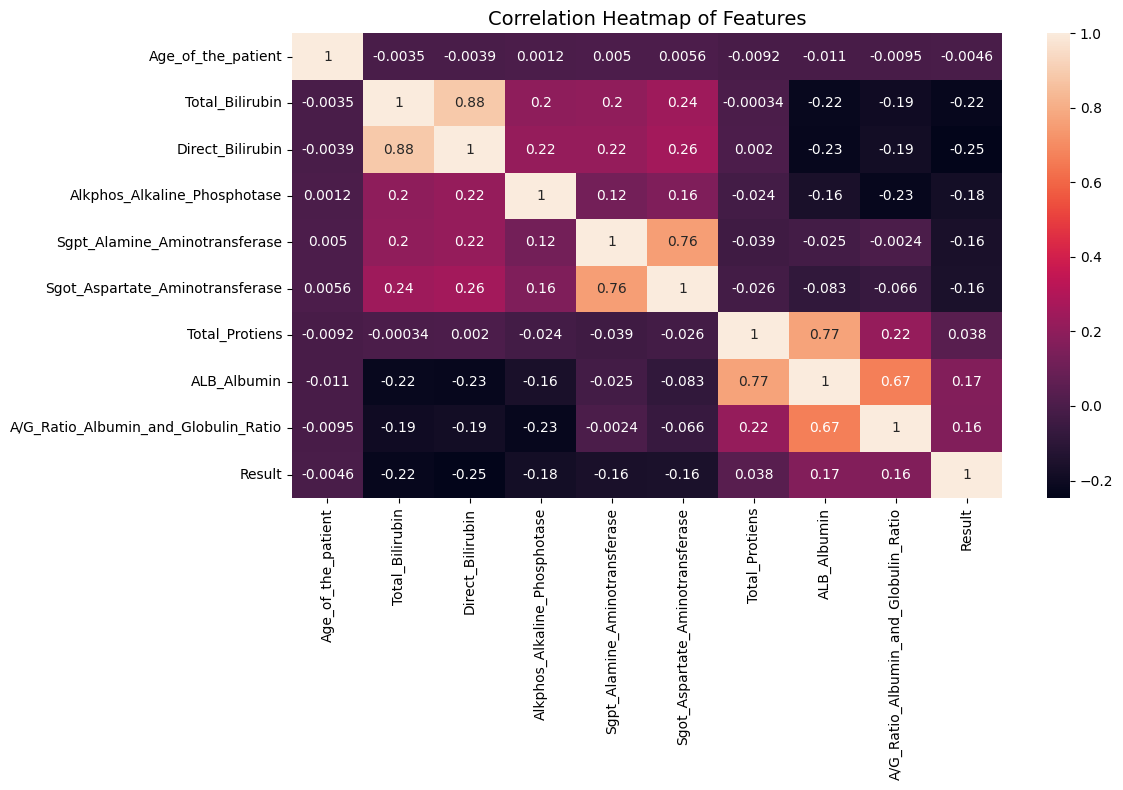

In [206]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.tight_layout()
plt.show()

## Outlier Detection
Boxplots are used to visualize outliers in each numerical feature before treatment.

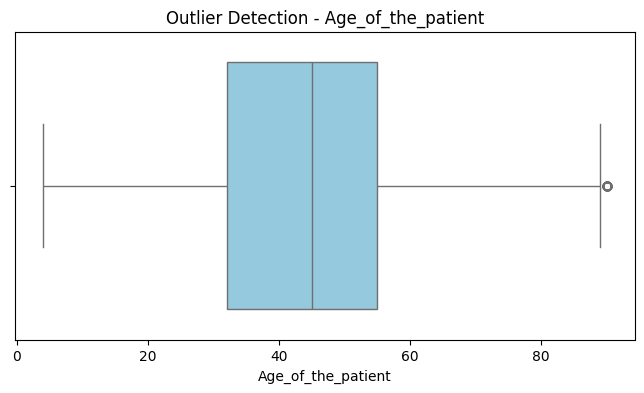

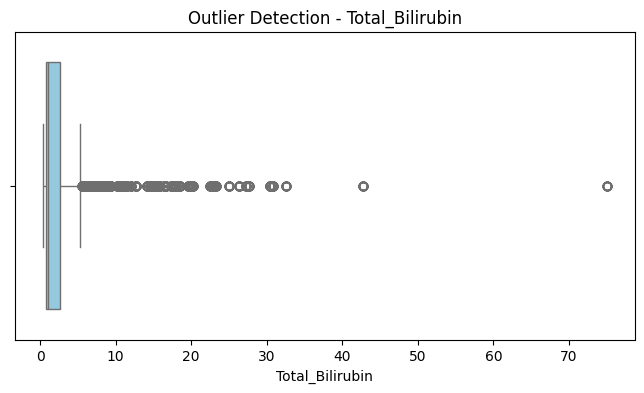

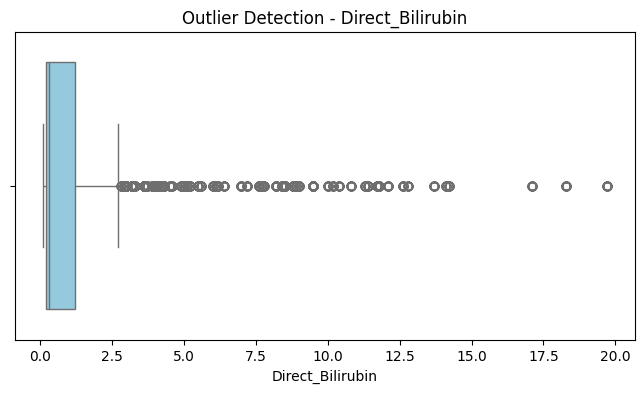

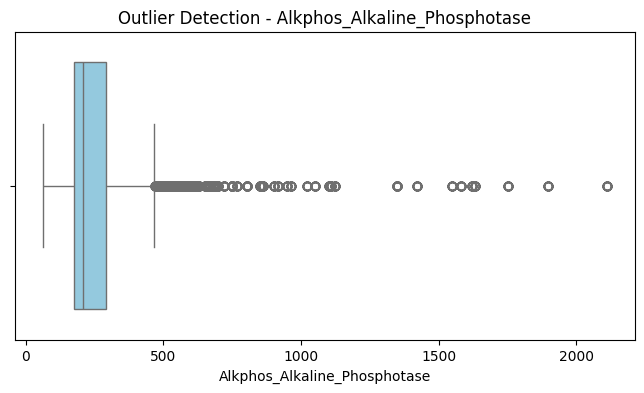

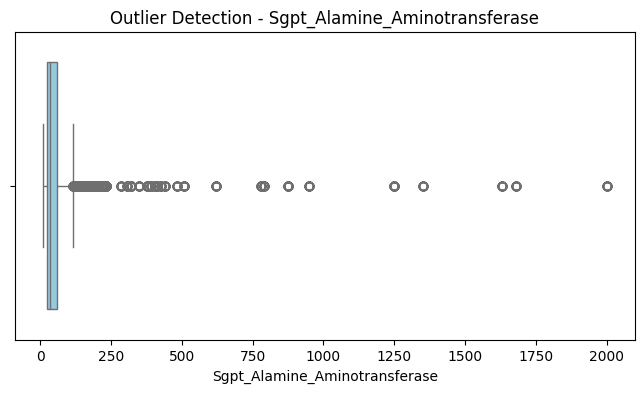

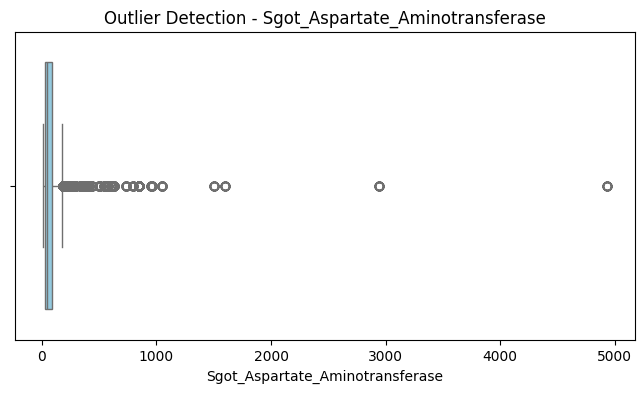

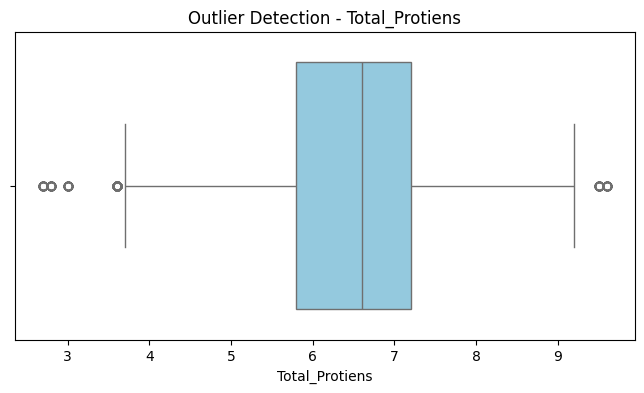

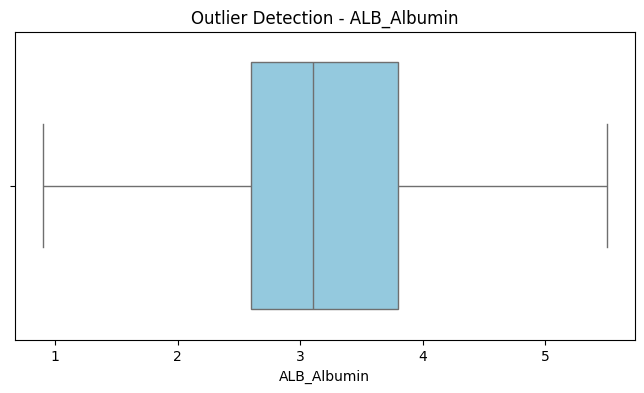

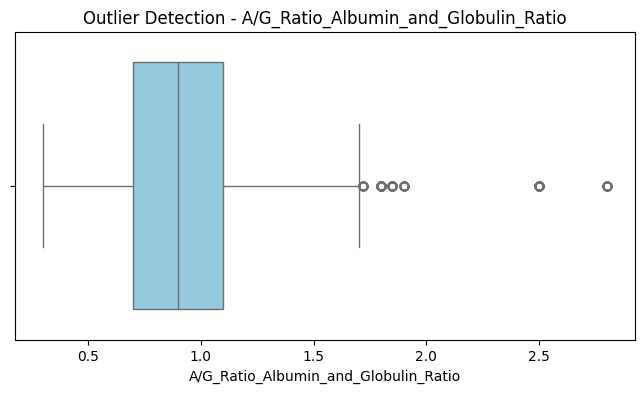

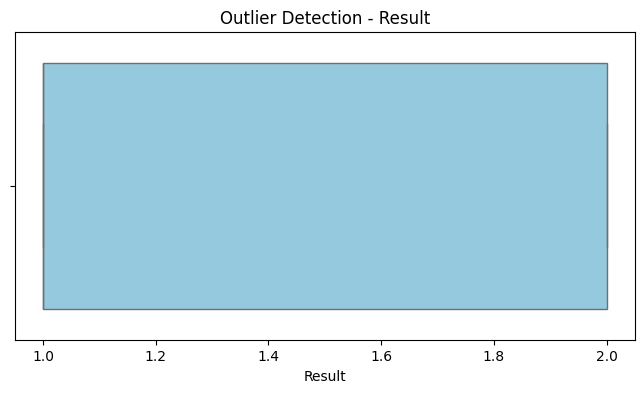

In [207]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Outlier Detection - {col}')
    plt.xlabel(col)
    plt.show()

## Outlier Handling
Outliers are detected using IQR method and clipped within statistical limits.


In [208]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

## Gender Based Analysis
Comparing liver disease distribution between male and female patients.


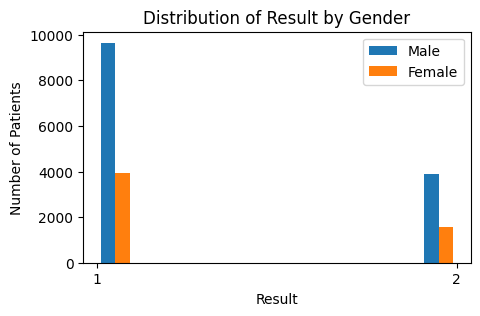

In [209]:
male_results = df[df['Gender_of_the_patient']=='Male']['Result']
female_results = df[df['Gender_of_the_patient']=='Female']['Result']
plt.figure(figsize=(5,3))
plt.hist([male_results, female_results],label=['Male','Female'])
plt.xticks([1, 2])
plt.xlabel("Result")
plt.ylabel("Number of Patients")
plt.title("Distribution of Result by Gender")
plt.legend()
plt.show()


## Target Separation
Removing categorical column and separating features and target variable.


In [210]:
df=df.drop(columns=["Gender_of_the_patient"])
x=df.drop(columns=["Result"])
y=df["Result"]

## Train-Test Split and Feature Scaling
Dataset is divided into training and testing sets. StandardScaler is used for normalization.


In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

##  Multi Layer Perceptron Model
Training neural network classifier and evaluating performance.


In [212]:

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='adaptive',
    max_iter=300,
    early_stopping=True,
    random_state=42
)
mlp.fit(x_train_scaled,y_train)
y_train_pred_mlp=mlp.predict(x_train_scaled)
y_test_pred_mlp=mlp.predict(x_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_mlp))

Confusion Matrix:
[[2722   58]
 [ 149  888]]


###  MLP Evaluation


In [213]:
mlp_train_accuracy = accuracy_score(y_train, y_train_pred_mlp)
mlp_train_precision = precision_score(y_train, y_train_pred_mlp)
mlp_train_recall = recall_score(y_train, y_train_pred_mlp)
mlp_train_f1 = f1_score(y_train, y_train_pred_mlp)

mlp_test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
mlp_test_precision = precision_score(y_test, y_test_pred_mlp)
mlp_test_recall = recall_score(y_test, y_test_pred_mlp)
mlp_test_f1 = f1_score(y_test, y_test_pred_mlp)

print("Training Performance:")
print("Accuracy :", mlp_train_accuracy)
print("Precision:", mlp_train_precision)
print("Recall   :", mlp_train_recall)
print("F1-score :", mlp_train_f1)

print("\nTest Performance:")
print("Accuracy :", mlp_test_accuracy)
print("Precision:", mlp_test_precision)
print("Recall   :", mlp_test_recall)
print("F1-score :", mlp_test_f1)



Training Performance:
Accuracy : 0.9502161666448317
Precision: 0.9501117568171659
Recall   : 0.9813463847077293
F1-score : 0.965476514945035

Test Performance:
Accuracy : 0.9457689284778622
Precision: 0.9481017067223964
Recall   : 0.979136690647482
F1-score : 0.9633693151654574


##  Logistic Regression Model


In [214]:
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_train_pred_lr=lr.predict(x_train_scaled)
y_test_pred_lr=lr.predict(x_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_lr))

Confusion Matrix:
[[2521  259]
 [ 756  281]]


In [215]:
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
train_precision_lr = precision_score(y_train, y_train_pred_lr)
train_recall_lr = recall_score(y_train, y_train_pred_lr)
train_f1_lr = f1_score(y_train, y_train_pred_lr)

test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)
test_precision_lr = precision_score(y_test, y_test_pred_lr)
test_recall_lr = recall_score(y_test, y_test_pred_lr)
test_f1_lr = f1_score(y_test, y_test_pred_lr)

print("Training Performance:")
print("Accuracy :", train_accuracy_lr)
print("Precision:", train_precision_lr)
print("Recall   :", train_recall_lr)
print("F1-score :", train_f1_lr)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_lr)
print("Precision:", test_precision_lr)
print("Recall   :", test_recall_lr)
print("F1-score :", test_f1_lr)

Training Performance:
Accuracy : 0.7221931088693829
Precision: 0.7522591514780211
Recall   : 0.9071013020592853
F1-score : 0.8224557290576464

Test Performance:
Accuracy : 0.7340843594445899
Precision: 0.7693011901129081
Recall   : 0.9068345323741007
F1-score : 0.8324252930493644


##  Decision Tree


In [216]:
dt=DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(x_train,y_train)
y_train_pred_dt=dt.predict(x_train)
y_test_pred_dt=dt.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_dt))

Confusion Matrix:
[[2705   75]
 [ 379  658]]


In [217]:
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_precision_dt = precision_score(y_train, y_train_pred_dt)
train_recall_dt = recall_score(y_train, y_train_pred_dt)
train_f1_dt = f1_score(y_train, y_train_pred_dt)

test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_precision_dt = precision_score(y_test, y_test_pred_dt)
test_recall_dt = recall_score(y_test, y_test_pred_dt)
test_f1_dt = f1_score(y_test, y_test_pred_dt)

print("Training Performance:")
print("Accuracy :", train_accuracy_dt)
print("Precision:", train_precision_dt)
print("Recall   :", train_recall_dt)
print("F1-score :", train_f1_dt)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_dt)
print("Precision:", test_precision_dt)
print("Recall   :", test_recall_dt)
print("F1-score :", test_f1_dt)

Training Performance:
Accuracy : 0.8787501637626097
Precision: 0.8691611842105263
Recall   : 0.9759903961584634
F1-score : 0.9194832311105311

Test Performance:
Accuracy : 0.8810584228451663
Precision: 0.8771076523994812
Recall   : 0.9730215827338129
F1-score : 0.9225784447476125


## Hyperparameter Tuning
Optimizing Logistic Regression and Decision Tree models using RandomizedSearchCV.


### logistic Regression

In [218]:
param_grid_lr= {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'fit_intercept': [True, False],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear']
}
random_lr = RandomizedSearchCV(estimator=lr, param_distributions=param_grid_lr, cv=5, scoring='accuracy',random_state=42)
random_lr.fit(x_train_scaled, y_train)
best_model_lr = random_lr.best_estimator_
y_train_pred_tuned_lr = best_model_lr.predict(x_train_scaled)
y_test_pred_tuned_lr = best_model_lr.predict(x_test_scaled)
best_params_lr=random_lr.best_params_
print("Best Hyperparameters:", best_params_lr)

print("Best CV Accuracy:", random_lr.best_score_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_tuned_lr))

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'fit_intercept': True, 'C': 100}
Best CV Accuracy: 0.7212763766773896
Confusion Matrix:
[[2521  259]
 [ 755  282]]


In [219]:
train_accuracy_tuned_lr = accuracy_score(y_train, y_train_pred_tuned_lr)
train_precision_tuned_lr = precision_score(y_train, y_train_pred_tuned_lr)
train_recall_tuned_lr = recall_score(y_train, y_train_pred_tuned_lr)
train_f1_tuned_lr = f1_score(y_train, y_train_pred_tuned_lr)

test_accuracy_tuned_lr = accuracy_score(y_test, y_test_pred_tuned_lr)
test_precision_tuned_lr = precision_score(y_test, y_test_pred_tuned_lr)
test_recall_tuned_lr = recall_score(y_test, y_test_pred_tuned_lr)
test_f1_tuned_lr = f1_score(y_test, y_test_pred_tuned_lr)

print("Training Performance:")
print("Accuracy :", train_accuracy_tuned_lr)
print("Precision:", train_precision_tuned_lr)
print("Recall   :", train_recall_tuned_lr)
print("F1-score :", train_f1_tuned_lr)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_tuned_lr)
print("Precision:", test_precision_tuned_lr)
print("Recall   :", test_recall_tuned_lr)
print("F1-score :", test_f1_tuned_lr)

Training Performance:
Accuracy : 0.7223241189571598
Precision: 0.7524130534702007
Recall   : 0.9070089574291255
F1-score : 0.8225097349579199

Test Performance:
Accuracy : 0.734346345297354
Precision: 0.7695360195360196
Recall   : 0.9068345323741007
F1-score : 0.832562747688243


### Decision Tree

In [220]:
param_dist_dt = {
    'criterion': [ 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [10, 20, 30, 50],
    'min_samples_leaf': [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}
random_dt=RandomizedSearchCV(estimator=dt, param_distributions=param_dist_dt, cv=5, scoring='accuracy',random_state=42)
random_dt.fit(x_train_scaled, y_train)
best_model_dt = random_dt.best_estimator_
y_train_pred_tuned_dt=best_model_dt.predict(x_train_scaled)
y_test_pred_tuned_dt=best_model_dt.predict(x_test_scaled)
best_params_dt=random_dt.best_params_
print("Best Hyperparameters:", best_params_dt)
print("Best CV Accuracy:", random_dt.best_score_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_tuned_dt))

Best Hyperparameters: {'splitter': 'random', 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'entropy'}
Best CV Accuracy: 0.8775053298729647
Confusion Matrix:
[[2628  152]
 [ 331  706]]


In [221]:
train_accuracy_tuned_dt = accuracy_score(y_train, y_train_pred_tuned_dt)
train_precision_tuned_dt = precision_score(y_train, y_train_pred_tuned_dt)
train_recall_tuned_dt = recall_score(y_train, y_train_pred_tuned_dt)
train_f1_tuned_dt = f1_score(y_train, y_train_pred_tuned_dt)

test_accuracy_tuned_dt = accuracy_score(y_test, y_test_pred_tuned_dt)
test_precision_tuned_dt = precision_score(y_test, y_test_pred_tuned_dt)
test_recall_tuned_dt = recall_score(y_test, y_test_pred_tuned_dt)
test_f1_tuned_dt = f1_score(y_test, y_test_pred_tuned_dt)

print("Training Performance:")
print("Accuracy :", train_accuracy_tuned_dt)
print("Precision:", train_precision_tuned_dt)
print("Recall   :", train_recall_tuned_dt)
print("F1-score :", train_f1_tuned_dt)

print("\nTest Performance:")
print("Accuracy :", test_accuracy_tuned_dt)
print("Precision:", test_precision_tuned_dt)
print("Recall   :", test_recall_tuned_dt)
print("F1-score :", test_f1_tuned_dt)

Training Performance:
Accuracy : 0.8742958207781999
Precision: 0.8811601642710473
Recall   : 0.9510573460153292
F1-score : 0.9147755029533241

Test Performance:
Accuracy : 0.8734608331150118
Precision: 0.8881378844204123
Recall   : 0.9453237410071943
F1-score : 0.9158389963408259


## Feature Importance Selection



In [222]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
n_features_to_select = 6
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
x_train_top = rfe.fit_transform(x_train, y_train)
x_test_top = rfe.transform(x_test)


feature_ranking = rfe.ranking_
feature_support = rfe.support_

feature_names = x_train.columns[rfe.support_]
print("features ",feature_names)

features  Index(['Total_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin'],
      dtype='object')


In [223]:
lr=LogisticRegression(max_iter=300,random_state=42)
lr.fit(x_train_top,y_train)
y_train_pred=lr.predict(x_train_top)
y_test_pred=lr.predict(x_test_top)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2532  248]
 [ 765  272]]


In [224]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)

Training Performance:
Accuracy : 0.7255338661076903
Precision: 0.7526063465489689
Recall   : 0.9132883922799889
F1-score : 0.8251981643721318

Test Performance:
Accuracy : 0.7346083311501179
Precision: 0.7679708826205641
Recall   : 0.9107913669064748
F1-score : 0.833305907520158


In [225]:
dt=DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt.fit(x_train_top,y_train)
y_train_pred=dt.predict(x_train_top)
y_test_pred=dt.predict(x_test_top)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[2613  167]
 [ 190  847]]


In [226]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Training Performance:")
print("Accuracy :", train_accuracy)
print("Precision:", train_precision)
print("Recall   :", train_recall)
print("F1-score :", train_f1)

print("\nTest Performance:")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)

Training Performance:
Accuracy : 0.9053452115812918
Precision: 0.9286497350630367
Recall   : 0.9386831655739218
F1-score : 0.9336394948335247

Test Performance:
Accuracy : 0.9064710505632696
Precision: 0.9322154834106314
Recall   : 0.9399280575539568
F1-score : 0.9360558839333691


##  Model Retraining Using Top Features
Models are retrained using selected important features.


In [227]:
lr_final=LogisticRegression(**best_params_lr, random_state=42)
lr_final.fit(x_train_top,y_train)
y_train_pred_final_lr=lr_final.predict(x_train_top)
y_test_pred_final_lr=lr_final.predict(x_test_top)
lr_train_acc = accuracy_score(y_train, y_train_pred_final_lr)
lr_train_precision = precision_score(y_train, y_train_pred_final_lr)
lr_train_recall = recall_score(y_train, y_train_pred_final_lr)
lr_train_f1 = f1_score(y_train, y_train_pred_final_lr)

lr_test_acc = accuracy_score(y_test, y_test_pred_final_lr)
lr_test_precision = precision_score(y_test, y_test_pred_final_lr)
lr_test_recall = recall_score(y_test, y_test_pred_final_lr)
lr_test_f1 = f1_score(y_test, y_test_pred_final_lr)
lr_cv_score=random_lr.best_score_
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_final_lr))

Confusion Matrix:
[[2532  248]
 [ 765  272]]


In [228]:
dt_final=DecisionTreeClassifier(**best_params_dt, random_state=42)
dt_final.fit(x_train_top,y_train)
y_train_pred_final_dt=dt_final.predict(x_train_top)
y_test_pred_final_dt=dt_final.predict(x_test_top)
dt_train_acc = accuracy_score(y_train, y_train_pred_final_dt)
dt_train_precision = precision_score(y_train, y_train_pred_final_dt)
dt_train_recall = recall_score(y_train, y_train_pred_final_dt)
dt_train_f1 = f1_score(y_train, y_train_pred_final_dt)

dt_test_acc = accuracy_score(y_test, y_test_pred_final_dt)
dt_test_precision = precision_score(y_test, y_test_pred_final_dt)
dt_test_recall = recall_score(y_test, y_test_pred_final_dt)
dt_test_f1 = f1_score(y_test, y_test_pred_final_dt)

dt_cv_score=random_dt.best_score_
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred_final_dt))

Confusion Matrix:
[[2625  155]
 [ 248  789]]


## Final Model Comparison
Comparing performance metrics of optimized models.


In [229]:
comparison_df = pd.DataFrame({
    'Model': ['MLP', 'Logistic Regression (Classical)', 'Decision Tree (Classical)',
              'Logistic Regression (Final)', 'Decision Tree (Final)'],
    'Features Used': [x_test_scaled.shape[1], x_test_scaled.shape[1], x_test.shape[1],
                      n_features_to_select, n_features_to_select],
    'CV Score': ['-', '-', '-', round(lr_cv_score, 2), round(dt_cv_score, 2)],
    'Accuracy': [round(mlp_test_accuracy, 2), round(test_accuracy_lr, 2), round(test_accuracy_dt, 2),
                 round(lr_test_acc, 2), round(dt_test_acc, 2)],
    'Precision': [round(mlp_test_precision, 2), round(test_precision_lr, 2), round(test_precision_dt, 2),
                  round(lr_test_precision, 2), round(dt_test_precision, 2)],
    'Recall': [round(mlp_test_recall, 2), round(test_recall_lr, 2), round(test_recall_dt, 2),
               round(lr_test_recall, 2), round(dt_test_recall, 2)],
    'F1-Score': [round(mlp_test_f1, 2), round(test_f1_lr, 2), round(test_f1_dt, 2),
                 round(lr_test_f1, 2), round(dt_test_f1, 2)]
})

print(" Model Comparison Table:")
print(comparison_df)

 Model Comparison Table:
                             Model  Features Used CV Score  Accuracy  \
0                              MLP              9        -      0.95   
1  Logistic Regression (Classical)              9        -      0.73   
2        Decision Tree (Classical)              9        -      0.88   
3      Logistic Regression (Final)              6     0.72      0.73   
4            Decision Tree (Final)              6     0.88      0.89   

   Precision  Recall  F1-Score  
0       0.95    0.98      0.96  
1       0.77    0.91      0.83  
2       0.88    0.97      0.92  
3       0.77    0.91      0.83  
4       0.91    0.94      0.93  
